# Muesli Data Analysis

## Pre-Setup

### Environment

In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_palette("magma")

### Read in data

In [ ]:
#df_orders = pd.read_excel("./data/Muesli Project raw data.xlsx",sheet_name="Orders",header=1)
#df_campaign = pd.read_excel("./data/Muesli Project raw data.xlsx", sheet_name="Campaign Data")
#df_order_process = pd.read_excel("./data/Muesli Project raw data.xlsx", sheet_name="Order Process Data")
#df_interndata = pd.read_excel("./data/Muesli Project raw data.xlsx", sheet_name="InternData Study")

### Raw dataframes

In [285]:
df_orders.head(2)

,index,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714


In [286]:
df_campaign.head(2)

,order id,arrival scan date,customer name
0,CA-2019-109666,2019-05-03,Kunst Miller
1,CA-2019-138933,2019-05-03,Jack Lebron


In [334]:
df_order_process.head(2)

,row id,order id,order date,on truck scan date,ship mode
0,3074,CA-2019-125206,2019-01-03,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,2019-01-09,Standard Processing


In [288]:
df_interndata.head(2)

,order id,ready to ship date,pickup date
0,CA-2019-116540,2019-09-02,2019-09-03
1,CA-2019-116540,2019-09-02,2019-09-03


### Data cleaning function

In [ ]:
def data_cleaning(df, df_type):
    
    # make col names lower
    df.columns = df.columns.str.lower()

    
    # orders data
    if df_type == "orders":
        # dropping cols
        df = df.drop(["index", "customer name", "origin channel", "category", "sub-category", "product id", "sales", "quantity", "discount", "profit"],axis=1)
        # dropping duplicates
        df = df.drop_duplicates()
        # renaming values in ship mode
        df["ship mode"] = df["ship mode"].str.replace(" Class","")
        df["ship mode"] = df["ship mode"].str.replace("Second","Standard")
        df["ship mode"] = df["ship mode"].str.replace("First","Express")
    
    # campaign data
    elif df_type == "campaign":
        # dropping cols
        df = df.drop("customer name", axis=1)
        # dropping duplicates
        pass

    # order process data    
    elif df_type == "order_process":
        # dropping cols
        df = df.drop("row id", axis=1)
        # dropping duplicates
        df = df.drop_duplicates()
        # dropping 1 duplicate row for id (scanned on truck twice)
        df = df.drop_duplicates(subset=["order id"], keep = "first")
        # dropping column order date, because 100% match with order date in orders data
        df = df.drop("order date", axis=1)
        # dropping column ship mode, because 100% match with ship mode in orders data (assumption: second class shipping = standard)
        df = df.drop("ship mode", axis=1)


    #intern data
    else:
        # dropping cols
        pass
        # dropping duplicates
        df = df.drop_duplicates()
        # dropping column pickup date, because 100% match with on truck scan date
        df = df.drop("pickup date", axis=1)

    

    return df

### Checks for cleaning function

#### Orders data

In [290]:
df_orders_1 = data_cleaning(df_orders,"orders")
df_orders_1

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region
0,CA-2019-121755,2019-01-16,Standard,EH-13945,United States,Los Angeles,California,90049.0,West
1,CA-2019-118255,2019-03-11,Express,ON-18715,United States,Eagan,Minnesota,55122.0,Central
2,CA-2019-169194,2019-06-20,Standard,LH-16900,United States,Dover,Delaware,19901.0,East
3,CA-2019-111682,2019-06-17,Express,TB-21055,United States,Troy,New York,12180.0,East
4,CA-2018-135545,2018-11-24,Standard,KM-16720,United States,Los Angeles,California,90004.0,West
...,...,...,...,...,...,...,...,...,...
9979,CA-2019-146913,2019-10-31,Standard,SF-20965,United States,San Francisco,California,94109.0,West
9980,US-2017-114377,2017-11-05,Express,BG-11035,United States,Hampton,Virginia,23666.0,South
9984,CA-2020-107209,2020-07-27,Standard,JW-15955,United States,Raleigh,North Carolina,27604.0,South
9986,US-2020-152842,2020-07-16,Standard,NF-18385,United States,Charlotte,North Carolina,28205.0,South


In [291]:
df_orders_1.duplicated().value_counts()

False    5009
Name: count, dtype: int64

In [292]:
df_orders_1["order id"].nunique()

5009

In [293]:
df_orders_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5009 entries, 0 to 9988
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order id        5009 non-null   object        
 1   order date      5009 non-null   datetime64[ns]
 2   ship mode       5009 non-null   object        
 3   customer id     5009 non-null   object        
 4   country/region  5009 non-null   object        
 5   city            5009 non-null   object        
 6   state           5009 non-null   object        
 7   postal code     5003 non-null   float64       
 8   region          5009 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 391.3+ KB


#### Campaign data

In [294]:
df_campaign_1 = data_cleaning(df_campaign,"campaign")
df_campaign_1

,order id,arrival scan date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


In [295]:
df_campaign_1.duplicated().value_counts()

False    333
Name: count, dtype: int64

In [296]:
df_campaign_1["order id"].nunique()

333

In [297]:
df_campaign_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order id           333 non-null    object        
 1   arrival scan date  333 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 5.3+ KB


#### Order process data

In [298]:
df_order_process_1 = data_cleaning(df_order_process,"order_process")
df_order_process_1

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [299]:
df_order_process_1.duplicated().value_counts()

False    3002
Name: count, dtype: int64

In [300]:
df_order_process_1["order id"].duplicated().value_counts()

order id
False    3002
Name: count, dtype: int64

In [301]:
df_order_process_1.drop_duplicates("order id")


,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [302]:
duplicates = df_order_process_1[df_order_process_1["order id"].duplicated(keep=False)]
duplicates

,order id,on truck scan date


In [303]:
df_order_process_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 5898
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            3002 non-null   object        
 1   on truck scan date  3002 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 70.4+ KB


#### Intern data

In [304]:
df_interndata_1 = data_cleaning(df_interndata,"intern")
df_interndata_1

,order id,ready to ship date
0,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05
5,CA-2019-158099,2019-09-05
...,...,...
283,US-2020-165456,2020-12-03
284,US-2020-110576,2020-12-04
285,CA-2020-105333,2020-12-04
288,CA-2020-119305,2020-12-04


In [305]:
df_interndata_1.duplicated().value_counts()

False    204
Name: count, dtype: int64

In [306]:
df_interndata_1["order id"].duplicated().value_counts()

order id
False    204
Name: count, dtype: int64

In [307]:
df_interndata_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 289
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            204 non-null    object        
 1   ready to ship date  204 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.8+ KB


#### Truck scan vs intern scan

In [308]:
#merged_truck = df_order_process_1.merge(df_interndata_1, on="order id", how="outer")
#merged_truck = merged_truck[["order id","on truck scan date","pickup date"]].dropna()
#merged_truck

In [309]:
#merged_truck["diff"] = merged_truck["on truck scan date"] - merged_truck["pickup date"]
#merged_truck

#### Order dates & shipping methods

In [310]:
#merged_op = df_orders_1.merge(df_order_process_1, on="order id", how="outer").dropna()

In [311]:
#merged_op[["order id","order date_x","ship mode_x","order date_y","ship mode_y"]]
#merged_op["date_diff"] = merged_op["order date_x"]-merged_op["order date_y"]
#merged_op["date_diff"].value_counts()

In [312]:
#merged_op

In [313]:
#merged_op[["order id","ship mode_x","ship mode_y"]]

In [314]:
#merged_op["ship mode_x"].value_counts()

In [315]:
#merged_op["ship mode_y"].value_counts()

In [316]:
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace(" Class","")
#merged_op["ship mode_y"] = merged_op["ship mode_y"].str.replace(" Processing","")
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace("Second","Standard")
#merged_op["ship mode_x"] = merged_op["ship mode_x"].str.replace("First","Express")

In [317]:
#merged_op[["order id","ship mode_x","ship mode_y"]]

In [318]:
#merged_op['match'] = merged_op['ship mode_x'] == merged_op['ship mode_y']
#merged_op['match'].value_counts()

## Cleaned dataframes

In [319]:
df_orders_cleaned = data_cleaning(df_orders,"orders")
df_campaign_cleaned = data_cleaning(df_campaign,"campaign")
df_order_process_cleaned = data_cleaning(df_order_process,"order_process")
df_interndata_cleaned = data_cleaning(df_interndata,"intern")

In [320]:
df_orders_cleaned

,order id,order date,ship mode,customer id,country/region,city,state,postal code,region
0,CA-2019-121755,2019-01-16,Standard,EH-13945,United States,Los Angeles,California,90049.0,West
1,CA-2019-118255,2019-03-11,Express,ON-18715,United States,Eagan,Minnesota,55122.0,Central
2,CA-2019-169194,2019-06-20,Standard,LH-16900,United States,Dover,Delaware,19901.0,East
3,CA-2019-111682,2019-06-17,Express,TB-21055,United States,Troy,New York,12180.0,East
4,CA-2018-135545,2018-11-24,Standard,KM-16720,United States,Los Angeles,California,90004.0,West
...,...,...,...,...,...,...,...,...,...
9979,CA-2019-146913,2019-10-31,Standard,SF-20965,United States,San Francisco,California,94109.0,West
9980,US-2017-114377,2017-11-05,Express,BG-11035,United States,Hampton,Virginia,23666.0,South
9984,CA-2020-107209,2020-07-27,Standard,JW-15955,United States,Raleigh,North Carolina,27604.0,South
9986,US-2020-152842,2020-07-16,Standard,NF-18385,United States,Charlotte,North Carolina,28205.0,South


In [321]:
df_campaign_cleaned

,order id,arrival scan date
0,CA-2019-109666,2019-05-03
1,CA-2019-138933,2019-05-03
2,CA-2019-130001,2019-05-03
3,CA-2019-113061,2019-05-06
4,CA-2019-162138,2019-05-06
...,...,...
328,CA-2020-129707,2020-05-08
329,CA-2020-125381,2020-05-08
330,CA-2020-141733,2020-05-15
331,US-2020-104451,2020-05-15


In [322]:
df_order_process_cleaned

,order id,on truck scan date
0,CA-2019-125206,2019-01-07
1,CA-2019-160304,2019-01-09
3,US-2019-116365,2019-01-09
6,CA-2019-105207,2019-01-09
8,CA-2019-158211,2019-01-09
...,...,...
5890,CA-2020-130631,2021-01-06
5892,CA-2020-126221,2021-01-06
5893,CA-2020-143259,2021-01-06
5896,CA-2020-115427,2021-01-06


In [323]:
df_interndata_cleaned

,order id,ready to ship date
0,CA-2019-116540,2019-09-02
2,CA-2019-129847,2019-09-04
3,CA-2019-129630,2019-09-04
4,CA-2019-106278,2019-09-05
5,CA-2019-158099,2019-09-05
...,...,...
283,US-2020-165456,2020-12-03
284,US-2020-110576,2020-12-04
285,CA-2020-105333,2020-12-04
288,CA-2020-119305,2020-12-04


## Metrics

### o_date_2_processed

### o_processes_2_truck

#### Data

In [326]:
df_processed = df_interndata_cleaned.copy()
df_processed["ready to ship date_weekday"] = df_processed["ready to ship date"].dt.dayofweek
df_processed

,order id,ready to ship date,ready to ship date_weekday
0,CA-2019-116540,2019-09-02,0
2,CA-2019-129847,2019-09-04,2
3,CA-2019-129630,2019-09-04,2
4,CA-2019-106278,2019-09-05,3
5,CA-2019-158099,2019-09-05,3
...,...,...,...
283,US-2020-165456,2020-12-03,3
284,US-2020-110576,2020-12-04,4
285,CA-2020-105333,2020-12-04,4
288,CA-2020-119305,2020-12-04,4


In [327]:
df_processed["ready to ship date_weekday"].value_counts()

ready to ship date_weekday
0    93
4    31
1    29
3    28
2    23
Name: count, dtype: int64

In [325]:
# ready to ship date only Mo - Fr checked!

In [328]:
df_processed_x_truck = df_order_process_cleaned.merge(df_processed, on="order id",how="inner")
df_processed_x_truck

,order id,on truck scan date,ready to ship date,ready to ship date_weekday
0,CA-2019-116540,2019-09-03,2019-09-02,0
1,CA-2019-129847,2019-09-04,2019-09-04,2
2,CA-2019-129630,2019-09-04,2019-09-04,2
3,CA-2019-158099,2019-09-06,2019-09-05,3
4,CA-2019-132143,2019-09-06,2019-09-05,3
...,...,...,...,...
199,CA-2020-159506,2020-12-04,2020-12-02,2
200,US-2020-110576,2020-12-07,2020-12-04,4
201,CA-2020-119305,2020-12-07,2020-12-04,4
202,CA-2020-105333,2020-12-07,2020-12-04,4


In [417]:
df_processed_x_truck_smode = df_processed_x_truck.merge(df_orders_cleaned, on="order id", how="inner")
df_processed_x_truck_smode = df_processed_x_truck_smode[["order id", "on truck scan date", "ready to ship date", "ready to ship date_weekday","ship mode","order date"]]
df_processed_x_truck_smode["o_processed_2_truck_actual"] = df_processed_x_truck_smethod["on truck scan date"] - df_processed_x_truck_smethod["ready to ship date"]
df_processed_x_truck_smode["o_processed_2_truck_actual"] = df_processed_x_truck_smode["o_processed_2_truck_actual"].dt.days
df_processed_x_truck_smode

,order id,on truck scan date,ready to ship date,ready to ship date_weekday,ship mode,order date,o_processed_2_truck_actual
0,CA-2019-116540,2019-09-03,2019-09-02,0,Express,2019-09-02,1
1,CA-2019-129847,2019-09-04,2019-09-04,2,Express,2019-09-02,0
2,CA-2019-129630,2019-09-04,2019-09-04,2,Express,2019-09-04,0
3,CA-2019-158099,2019-09-06,2019-09-05,3,Express,2019-09-03,1
4,CA-2019-132143,2019-09-06,2019-09-05,3,Express,2019-09-03,1
...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,2020-12-02,2,Standard,2020-11-27,2
200,US-2020-110576,2020-12-07,2020-12-04,4,Standard,2020-11-28,3
201,CA-2020-119305,2020-12-07,2020-12-04,4,Standard,2020-11-30,3
202,CA-2020-105333,2020-12-07,2020-12-04,4,Standard,2020-11-30,3


In [418]:
df_processed_x_truck_smode["order date_weekday"] = df_processed_x_truck_smode["order date"].dt.day_name()
df_processed_x_truck_smode

,order id,on truck scan date,ready to ship date,ready to ship date_weekday,ship mode,order date,o_processed_2_truck_actual,order date_weekday
0,CA-2019-116540,2019-09-03,2019-09-02,0,Express,2019-09-02,1,Monday
1,CA-2019-129847,2019-09-04,2019-09-04,2,Express,2019-09-02,0,Monday
2,CA-2019-129630,2019-09-04,2019-09-04,2,Express,2019-09-04,0,Wednesday
3,CA-2019-158099,2019-09-06,2019-09-05,3,Express,2019-09-03,1,Tuesday
4,CA-2019-132143,2019-09-06,2019-09-05,3,Express,2019-09-03,1,Tuesday
...,...,...,...,...,...,...,...,...
199,CA-2020-159506,2020-12-04,2020-12-02,2,Standard,2020-11-27,2,Friday
200,US-2020-110576,2020-12-07,2020-12-04,4,Standard,2020-11-28,3,Saturday
201,CA-2020-119305,2020-12-07,2020-12-04,4,Standard,2020-11-30,3,Monday
202,CA-2020-105333,2020-12-07,2020-12-04,4,Standard,2020-11-30,3,Monday


In [437]:
df_processed_x_truck_smode.groupby("ship mode")[["o_processed_2_truck_actual"]].agg(["mean","max","min"])

o_processed_2_truck_actual        
                                mean max min
ship mode                                   
Express                     0.396226   2   0
Standard                    1.986755   3   1

In [438]:
graph_1 = df_processed_x_truck_smode.groupby("ship mode")[["o_processed_2_truck_actual"]].mean().reset_index()
graph_1

,ship mode,o_processed_2_truck_actual
0,Express,0.396226
1,Standard,1.986755


In [439]:
graph_1["o_processed_2_truck_plan"] = {0:0,1:1}
graph_1

,ship mode,o_processed_2_truck_actual,o_processed_2_truck_plan
0,Express,0.396226,0
1,Standard,1.986755,1


In [440]:
# format for plot
graph_1 = pd.melt(graph_1,
    id_vars=["ship mode"],
    value_vars=["o_processed_2_truck_actual", "o_processed_2_truck_plan"],
    var_name="data type",
    value_name="days")

# renaming data type
graph_1["data type"] = graph_1["data type"].map({
    "o_processed_2_truck_actual": "Actual",
    "o_processed_2_truck_plan": "Plan"})

graph_1

,ship mode,data type,days
0,Express,Actual,0.396226
1,Standard,Actual,1.986755
2,Express,Plan,0.000000
3,Standard,Plan,1.000000


In [549]:
graph_2 = df_processed_x_truck_smode.groupby(["ship mode","order date_weekday"])[["o_processed_2_truck_actual"]].mean().reset_index()
graph_2

,ship mode,order date_weekday,o_processed_2_truck_actual
0,Express,Friday,0.000000
1,Express,Monday,0.500000
2,Express,Saturday,0.500000
3,Express,Thursday,0.200000
4,Express,Tuesday,0.846154
5,Express,Wednesday,0.090909
6,Standard,Friday,1.812500
7,Standard,Monday,2.280000
8,Standard,Saturday,2.777778
9,Standard,Sunday,1.666667


In [ ]:
# no sunday for express?

In [550]:
graph_2["identifyer"]=graph_2["ship mode"]+graph_2["order date_weekday"]
graph_2

,ship mode,order date_weekday,o_processed_2_truck_actual,identifyer
0,Express,Friday,0.000000,ExpressFriday
1,Express,Monday,0.500000,ExpressMonday
2,Express,Saturday,0.500000,ExpressSaturday
3,Express,Thursday,0.200000,ExpressThursday
4,Express,Tuesday,0.846154,ExpressTuesday
5,Express,Wednesday,0.090909,ExpressWednesday
6,Standard,Friday,1.812500,StandardFriday
7,Standard,Monday,2.280000,StandardMonday
8,Standard,Saturday,2.777778,StandardSaturday
9,Standard,Sunday,1.666667,StandardSunday


In [551]:
plan_values_dict = {"ExpressMonday":1,
                    "ExpressTuesday":0,
                    "ExpressWednesday":1,
                    "ExpressThursday":0,
                    "ExpressFriday":0,
                    "ExpressSaturday":1,
                    "ExpressSunday":1,
                    "StandardMonday":1,
                    "StandardTuesday":2,
                    "StandardWednesday":1,
                    "StandardThursday":3,
                    "StandardFriday":2,
                    "StandardSaturday":1,
                    "StandardSunday":1
                    }

In [552]:
graph_2["o_processed_2_truck_plan"] = graph_2["identifyer"].map(plan_values_dict)
graph_2 = graph_2.drop("identifyer",axis=1)
graph_2

,ship mode,order date_weekday,o_processed_2_truck_actual,o_processed_2_truck_plan
0,Express,Friday,0.000000,0
1,Express,Monday,0.500000,1
2,Express,Saturday,0.500000,1
3,Express,Thursday,0.200000,0
4,Express,Tuesday,0.846154,0
5,Express,Wednesday,0.090909,1
6,Standard,Friday,1.812500,2
7,Standard,Monday,2.280000,1
8,Standard,Saturday,2.777778,1
9,Standard,Sunday,1.666667,1


In [553]:
# format for plot
graph_2 = pd.melt(graph_2,
    id_vars=["ship mode","order date_weekday"],
    value_vars=["o_processed_2_truck_actual", "o_processed_2_truck_plan"],
    var_name="data type",
    value_name="days")

# renaming data type
graph_2["data type"] = graph_2["data type"].map({
    "o_processed_2_truck_actual": "Actual",
    "o_processed_2_truck_plan": "Plan"})

graph_2

,ship mode,order date_weekday,data type,days
0,Express,Friday,Actual,0.000000
1,Express,Monday,Actual,0.500000
2,Express,Saturday,Actual,0.500000
3,Express,Thursday,Actual,0.200000
4,Express,Tuesday,Actual,0.846154
5,Express,Wednesday,Actual,0.090909
6,Standard,Friday,Actual,1.812500
7,Standard,Monday,Actual,2.280000
8,Standard,Saturday,Actual,2.777778
9,Standard,Sunday,Actual,1.666667


In [547]:
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

graph_2["order date_weekday"] = pd.Categorical(graph_2["order date_weekday"],categories=weekday_order, ordered=True)
graph_2

,ship mode,order date_weekday,data type,days
0,Express,Friday,Actual,0.000000
1,Express,Monday,Actual,0.500000
2,Express,Saturday,Actual,0.500000
3,Express,Thursday,Actual,0.200000
4,Express,Tuesday,Actual,0.846154
5,Express,Wednesday,Actual,0.090909
6,Standard,Friday,Actual,1.812500
7,Standard,Monday,Actual,2.280000
8,Standard,Saturday,Actual,2.777778
9,Standard,Sunday,Actual,1.666667


In [ ]:
graph_2_express = graph_2[graph_2["ship mode"]=="Express"].sort_values("order date_weekday")
graph_2_standard = graph_2[graph_2["ship mode"]=="Standard"].sort_values("order date_weekday")

graph_2_express

,ship mode,order date_weekday,data type,days
1,Express,Monday,Actual,0.500000
14,Express,Monday,Plan,1.000000
4,Express,Tuesday,Actual,0.846154
17,Express,Tuesday,Plan,0.000000
5,Express,Wednesday,Actual,0.090909
18,Express,Wednesday,Plan,1.000000
3,Express,Thursday,Actual,0.200000
16,Express,Thursday,Plan,0.000000
0,Express,Friday,Actual,0.000000
13,Express,Friday,Plan,0.000000


#### Plots

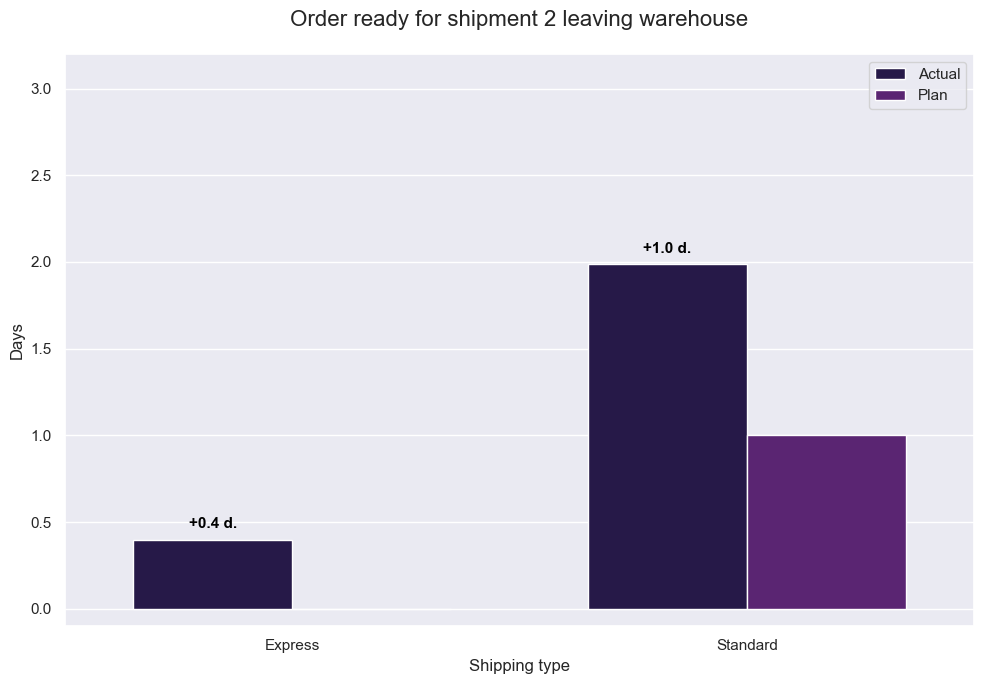

(None,)

In [545]:
graph = graph_1

plt.figure(figsize=(10, 7))

ax = sns.barplot(data=graph, 
             x= "ship mode",
             y = "days",
             hue="data type",
             hue_order=["Actual","Plan"],
             width=bar_width
            )
ax.set_ylim(-0.1, 3.2)
plt.title('Order ready for shipment 2 leaving warehouse', fontsize=16,pad=20)
plt.xlabel("Shipping type")
plt.ylabel("Days")
plt.legend()

bar_width = 0.7
offset = (bar_width / 4) # This calculates the offset needed to center on the 'Actual' bar

# Calculate and display the uplift (difference) as text above the bars
# Iterate through each ship mode ('Express' and 'Standard')
for i, ship_mode in enumerate(graph["ship mode"].unique()):
    # Get the 'Actual' and 'Plan' values for the current ship mode
    actual_days = graph[(graph["ship mode"] == ship_mode) & (graph["data type"] == "Actual")]["days"].iloc[0]
    plan_days = graph[(graph["ship mode"] == ship_mode) & (graph["data type"] == "Plan")]["days"].iloc[0]

    uplift = actual_days - plan_days
    
    # X-POSITION: Centered over the 'Actual' bar.
    # The first bar group (Express, i=0) is at x=0. The second (Standard, i=1) is at x=1.
    # The 'Actual' bar is typically slightly to the left of the center point (i - offset).
    x_pos = i - offset
    # y-position: slightly above the higher bar for the annotation
    y_pos = actual_days +0.05 # Adjust vertical position as needed

    # Determine text color (Green for improvement (lower days), Red for regression (higher days))
    color = "black"
    
    # Format the uplift text (e.g., "+0.50 days" or "-0.25 days")
    uplift_text = f"{uplift:+.1f} d." # Using + to explicitly show positive or negative

    # Add the uplift text
    ax.text(x_pos, y_pos, uplift_text,
            color=color, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show(),

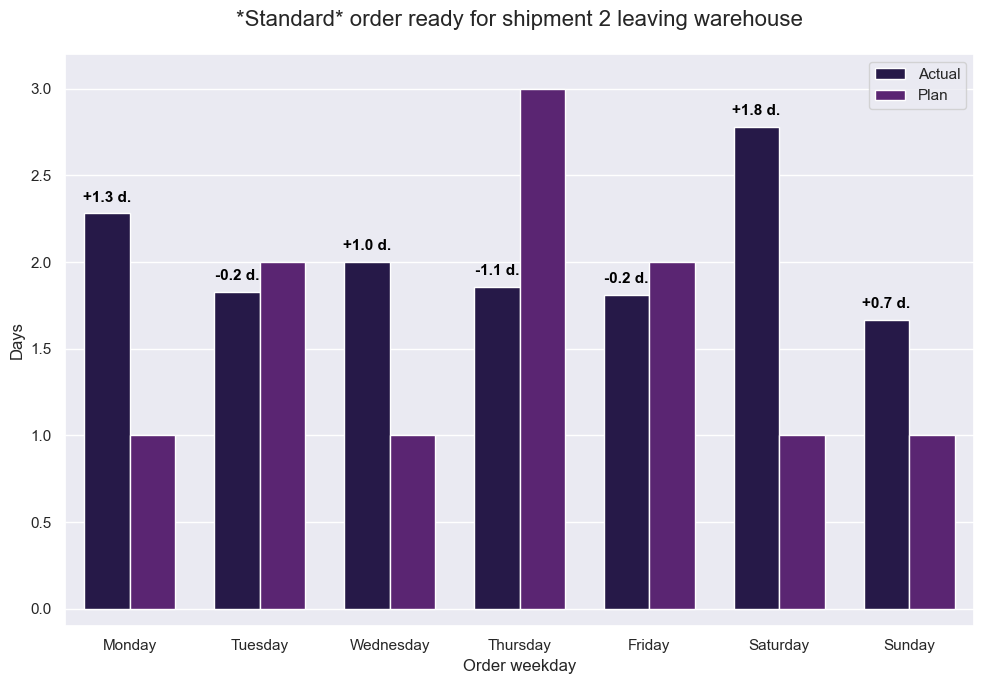

(None,)

In [543]:
graph = graph_2_standard

plt.figure(figsize=(10, 7))

ax = sns.barplot(data=graph, 
             x= "order date_weekday",
             y = "days",
             hue="data type",
             hue_order=["Actual","Plan"],
             width=bar_width,
             errorbar=None
            )
ax.set_ylim(-0.1, 3.2)
plt.title('*Standard* order ready for shipment 2 leaving warehouse', fontsize=16,pad=20)
plt.xlabel("Order weekday")
plt.ylabel("Days")
plt.legend()

bar_width = 0.7
offset = (bar_width / 4) # This calculates the offset needed to center on the 'Actual' bar


# Calculate and display the uplift (difference) as text above the bars
# Iterate through each unique WEEKDAY in the data
for i, weekday in enumerate(graph["order date_weekday"].unique()):
    # Get the 'Actual' and 'Plan' values for the current WEEKDAY
    
    # Filter the graph DataFrame by the current weekday
    weekday_data = graph[graph["order date_weekday"] == weekday]
    
    # Use the filtered data to extract the specific Actual and Plan values
    actual_days = weekday_data[weekday_data["data type"] == "Actual"]["days"].iloc[0]
    plan_days = weekday_data[weekday_data["data type"] == "Plan"]["days"].iloc[0]

    uplift = actual_days - plan_days
    
    # X-POSITION: Centered over the 'Actual' bar.
    # The first bar group (Express, i=0) is at x=0. The second (Standard, i=1) is at x=1.
    # The 'Actual' bar is typically slightly to the left of the center point (i - offset).
    x_pos = i - offset
    # y-position: slightly above the higher bar for the annotation
    y_pos = actual_days +0.05 # Adjust vertical position as needed

    # Determine text color (Green for improvement (lower days), Red for regression (higher days))
    color = "black"
    
    # Format the uplift text (e.g., "+0.50 days" or "-0.25 days")
    uplift_text = f"{uplift:+.1f} d." # Using + to explicitly show positive or negative

    # Add the uplift text
    ax.text(x_pos, y_pos, uplift_text,
            color=color, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show(),

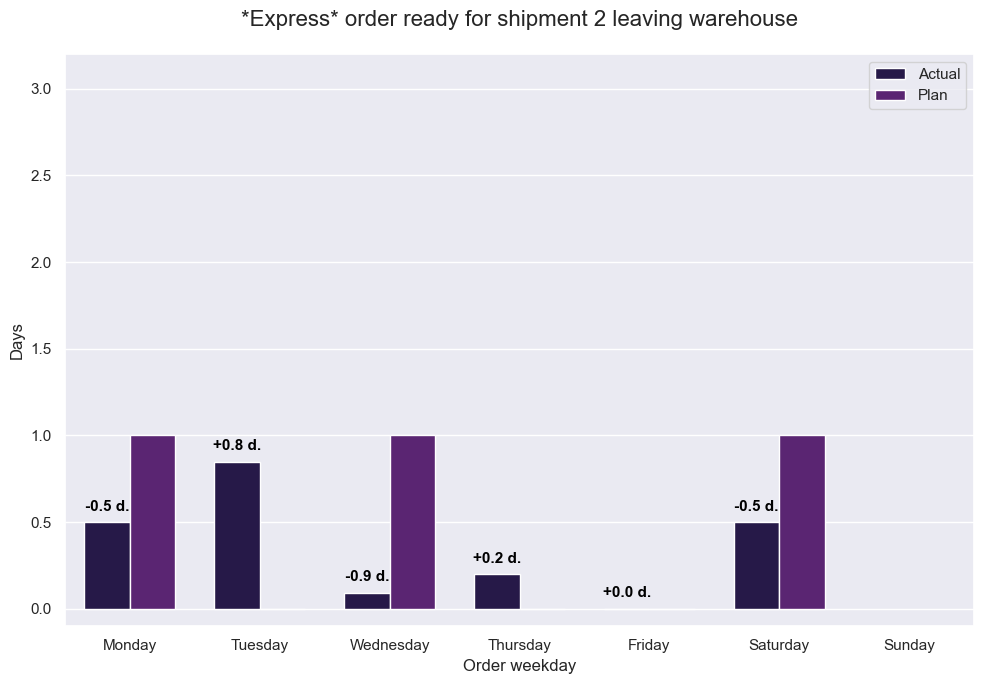

(None,)

In [544]:
graph = graph_2_express

plt.figure(figsize=(10, 7))

ax = sns.barplot(data=graph, 
             x= "order date_weekday",
             y = "days",
             hue="data type",
             hue_order=["Actual","Plan"],
             width=bar_width,
             errorbar=None
            )
ax.set_ylim(-0.1, 3.2)
plt.title('*Express* order ready for shipment 2 leaving warehouse', fontsize=16,pad=20)
plt.xlabel("Order weekday")
plt.ylabel("Days")
plt.legend()

bar_width = 0.7
offset = (bar_width / 4) # This calculates the offset needed to center on the 'Actual' bar


# Calculate and display the uplift (difference) as text above the bars
# Iterate through each unique WEEKDAY in the data
for i, weekday in enumerate(graph["order date_weekday"].unique()):
    # Get the 'Actual' and 'Plan' values for the current WEEKDAY
    
    # Filter the graph DataFrame by the current weekday
    weekday_data = graph[graph["order date_weekday"] == weekday]
    
    # Use the filtered data to extract the specific Actual and Plan values
    actual_days = weekday_data[weekday_data["data type"] == "Actual"]["days"].iloc[0]
    plan_days = weekday_data[weekday_data["data type"] == "Plan"]["days"].iloc[0]

    uplift = actual_days - plan_days
    
    # X-POSITION: Centered over the 'Actual' bar.
    # The first bar group (Express, i=0) is at x=0. The second (Standard, i=1) is at x=1.
    # The 'Actual' bar is typically slightly to the left of the center point (i - offset).
    x_pos = i - offset
    # y-position: slightly above the higher bar for the annotation
    y_pos = actual_days +0.05 # Adjust vertical position as needed

    # Determine text color (Green for improvement (lower days), Red for regression (higher days))
    color = "black"
    
    # Format the uplift text (e.g., "+0.50 days" or "-0.25 days")
    uplift_text = f"{uplift:+.1f} d." # Using + to explicitly show positive or negative

    # Add the uplift text
    ax.text(x_pos, y_pos, uplift_text,
            color=color, ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xticks()
plt.xticks()
plt.tight_layout()
plt.show(),

In [546]:
graph_2_express

,ship mode,order date_weekday,data type,days
1,Express,Monday,Actual,0.500000
14,Express,Monday,Plan,1.000000
4,Express,Tuesday,Actual,0.846154
17,Express,Tuesday,Plan,0.000000
5,Express,Wednesday,Actual,0.090909
18,Express,Wednesday,Plan,1.000000
3,Express,Thursday,Actual,0.200000
16,Express,Thursday,Plan,0.000000
0,Express,Friday,Actual,0.000000
13,Express,Friday,Plan,0.000000


### o_truck_2_delivered

### o_date_2_delivered

### o_processed_2_delivered

#### Data

In [403]:
df_processed_x_delivered = df_campaign_cleaned.merge(df_interndata_cleaned, on="order id",how="inner")
df_processed_x_delivered

,order id,arrival scan date,ready to ship date
0,CA-2019-129630,2019-09-09,2019-09-04
1,CA-2019-129847,2019-09-10,2019-09-04
2,CA-2019-106278,2019-09-10,2019-09-05
3,CA-2019-158099,2019-09-11,2019-09-05
4,CA-2019-123120,2019-09-16,2019-09-09
5,CA-2019-149783,2019-09-16,2019-09-09
6,CA-2019-102981,2019-09-16,2019-09-09
7,CA-2019-110023,2019-09-16,2019-09-11
8,CA-2019-133123,2019-09-16,2019-09-11
9,CA-2019-149223,2019-09-17,2019-09-11


#### Plots

In [ ]:
#not enough data